In [1]:
import sys
sys.path.append("../")
import numpy as np
from pyunlocbox import functions
import matplotlib.pyplot as plt
import varprons as vpns
from regularizers import capped_simplex
from applications import Trimming

In [2]:
# settings
n = 1000
k = 800
m = 2
mu1 = 1*np.ones(m)
mu2 = -1*np.ones(m)
sigma1 = .5
sigma2 = 1
beta = 1e-3

# create instance
example1 = Trimming(n, k, mu1, mu2, sigma1, sigma2, beta)

# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = capped_simplex(k_ = k)
        
# optimization parameters
Lyy = beta
L = k
Lb = k
otol = 200
itol = 1e-6
maxit = 500
rho = 1

In [3]:
# initial points
x0 = np.zeros(m)
y0 = capped_simplex.project(-np.linalg.norm(example1.data,axis=1)**2/beta,k)

# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,1000))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


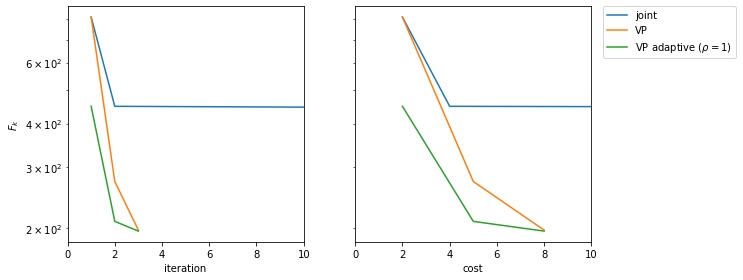

In [4]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3], ['joint','VP',r'VP adaptive ($\rho=1$)'])

ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/trimming_1a.eps',dpi=300,bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


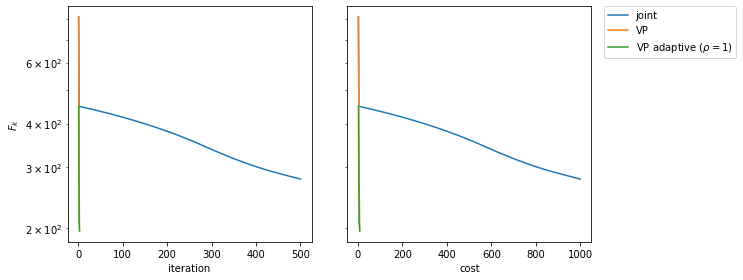

In [5]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3], ['joint','VP',r'VP adaptive ($\rho=1$)'])
fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/trimming_1aa.eps',dpi=300,bbox_inches='tight')

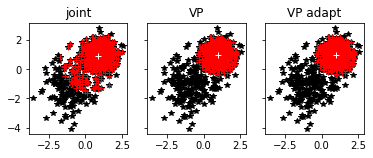

In [6]:
fig,ax=example1.plot_results([(x1,y1),(x2,y2),(x3,y3)],['joint','VP','VP adapt'])
plt.savefig('./results/trimming_1b.eps',dpi=300,bbox_inches='tight')